# Packages

In [1]:
%config Completer.use_jedi = False

# Standard packages
import pandas as pd
import numpy as np
import collections
from IPython.display import display, display_html

# Standard plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Network Analysis
import networkx as nx

# Science packages
from scipy.spatial.distance import squareform
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
import statsmodels.api as sm

# Own functions
from ipynb.fs.full.functions_cluster_analysis import *
from ipynb.fs.full.functions_data_manipulation import *
from ipynb.fs.full.functions_karrer import *
from ipynb.fs.full.functions_clustering_plot import *

sns.set(style = 'whitegrid')
# sns.set(style = 'white')

# Data and Graphs

In [2]:
# Main data, rename 'Probability_of_edge' to 'weight' so it is recognised as weight attribute
data = pd.read_csv("kelch_IBD_graph.csv")
data = data.rename(columns = {'Probability_of_edge':'weight', 'V1': 'source', 'V2': 'target'})

# get parasite types
codes, parasites = pd.factorize(np.concatenate((data['source'], data['target'])))
    
n = 1468            # number of parasites
n1 = data.shape[0]  # number of non-zero entries in adjacency metrix (upper triangular part) (1076778)

# add column, where parasites are indices from 0 to 1467
data['source_ind'] = codes[0:n1]
data['target_ind'] = codes[n1:(2*n1)]
data['type'] = 'undirected'

data = data.reindex(['source', 'target', 'source_ind', 'target_ind', 'weight', 'type'], axis = 1)

In [3]:
# read in meta data
meta = pd.read_csv("meta_data.csv")

# dictionary to destringize node labels, e.g. from '4' to 4
nodes_dict = {}
for key in range(1468):
    nodes_dict[str(key)] = key

In [4]:
G_bin1 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_bin1.gml"), nodes_dict)
G_bin50 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_bin50.gml"), nodes_dict)
G_sample = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sample.gml"), nodes_dict)

G_bin1_lcc = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_bin1_lcc.gml"), nodes_dict)
G_bin50_lcc = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_bin50_lcc.gml"), nodes_dict)
G_sample_lcc = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sample_lcc.gml"), nodes_dict)

G_sub25 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sub25.gml"), nodes_dict)
G_sub50 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sub50.gml"), nodes_dict)
G_sub75 = nx.relabel_nodes(nx.read_gml("Export_Graphs/G_sub75.gml"), nodes_dict)

In [5]:
dir_DCSBM = "Newman_code/Final/DCSBM/"
dir_SBM = "Newman_code/Final/SBM/"
dir_mu = 'Newman_code/Final/Mu/'
dir_np = 'Newman_code/Final/NP/'
dir_fold = ['G_bin1/', 'G_bin50/', 'G_sample/',
            'G_bin1_lcc/', 'G_bin50_lcc/', 'G_sample_lcc/',
            'G_sub25/', 'G_sub50/', 'G_sub75/']
dir_file_dcsbm = ['1_dcsbm_alloc.csv','2_dcsbm_alloc.csv','3_dcsbm_alloc.csv']
dir_file_dcsbm_analytics = ['1_dcsbm_analytics.csv','2_dcsbm_analytics.csv','3_dcsbm_analytics.csv']
dir_file_sbm = ['1_sbm_alloc.csv','2_sbm_alloc.csv','3_sbm_alloc.csv']
dir_file_sbm_analytics = ['1_sbm_analytics.csv','2_sbm_analytics.csv','3_sbm_analytics.csv']

# Load alloc files

In [6]:
col_names = ['Sweep', 'K', 'effective_K', 'Log_lik']

## DCSBM

In [7]:
G_bin1_DCSBM_df = []
G_bin50_DCSBM_df = []
G_sample_DCSBM_df = []

G_bin1_lcc_DCSBM_df = []
G_bin50_lcc_DCSBM_df = []
G_sample_lcc_DCSBM_df = []

G_sub25_DCSBM_df = []
G_sub50_DCSBM_df = []
G_sub75_DCSBM_df = []

G_bin1_DCSBM_df_analytics = []
G_bin50_DCSBM_df_analytics = []
G_sample_DCSBM_df_analytics = []

G_bin1_lcc_DCSBM_df_analytics = []
G_bin50_lcc_DCSBM_df_analytics = []
G_sample_lcc_DCSBM_df_analytics = []

G_sub25_DCSBM_df_analytics = []
G_sub50_DCSBM_df_analytics = []
G_sub75_DCSBM_df_analytics = []

In [8]:
for i in range(3):
    print(i)
    G_bin1_DCSBM_df.append(pd.read_csv(dir_DCSBM + dir_fold[0] + dir_file_dcsbm[i], header = None).T)
    G_bin50_DCSBM_df.append(pd.read_csv(dir_DCSBM + dir_fold[1] + dir_file_dcsbm[i], header = None).T)
    G_sample_DCSBM_df.append(pd.read_csv(dir_DCSBM + dir_fold[2] + dir_file_dcsbm[i], header = None).T)

    G_bin1_lcc_DCSBM_df.append(pd.read_csv(dir_DCSBM + dir_fold[3] + dir_file_dcsbm[i], header = None).T)
    G_bin50_lcc_DCSBM_df.append(pd.read_csv(dir_DCSBM + dir_fold[4] + dir_file_dcsbm[i], header = None).T)
    G_sample_lcc_DCSBM_df.append(pd.read_csv(dir_DCSBM + dir_fold[5] + dir_file_dcsbm[i], header = None).T)

    G_sub25_DCSBM_df.append(pd.read_csv(dir_DCSBM + dir_fold[6] + dir_file_dcsbm[i], header = None).T)
    G_sub50_DCSBM_df.append(pd.read_csv(dir_DCSBM + dir_fold[7] + dir_file_dcsbm[i], header = None).T)
    G_sub75_DCSBM_df.append(pd.read_csv(dir_DCSBM + dir_fold[8] + dir_file_dcsbm[i], header = None).T)
    ###
    G_bin1_DCSBM_df_analytics.append(pd.read_csv(dir_DCSBM + dir_fold[0] + dir_file_dcsbm_analytics[i],
                                                 header = None, names = col_names, index_col = False))
    G_bin50_DCSBM_df_analytics.append(pd.read_csv(dir_DCSBM + dir_fold[1] + dir_file_dcsbm_analytics[i],
                                                  header = None, names = col_names, index_col = False))
    G_sample_DCSBM_df_analytics.append(pd.read_csv(dir_DCSBM + dir_fold[2] + dir_file_dcsbm_analytics[i],
                                                       header = None, names = col_names, index_col = False))

    G_bin1_lcc_DCSBM_df_analytics.append(pd.read_csv(dir_DCSBM + dir_fold[3] + dir_file_dcsbm_analytics[i],
                                                     header = None, names = col_names, index_col = False))
    G_bin50_lcc_DCSBM_df_analytics.append(pd.read_csv(dir_DCSBM + dir_fold[4] + dir_file_dcsbm_analytics[i],
                                                      header = None, names = col_names, index_col = False))
    G_sample_lcc_DCSBM_df_analytics.append(pd.read_csv(dir_DCSBM + dir_fold[5] + dir_file_dcsbm_analytics[i],
                                             header = None, names = col_names, index_col = False))

    G_sub25_DCSBM_df_analytics.append(pd.read_csv(dir_DCSBM + dir_fold[6] + dir_file_dcsbm_analytics[i],
                                                  header = None, names = col_names, index_col = False))
    G_sub50_DCSBM_df_analytics.append(pd.read_csv(dir_DCSBM + dir_fold[7] + dir_file_dcsbm_analytics[i],
                                                  header = None, names = col_names, index_col = False))
    G_sub75_DCSBM_df_analytics.append(pd.read_csv(dir_DCSBM + dir_fold[8] + dir_file_dcsbm_analytics[i],
                                                  header = None, names = col_names, index_col = False))
    

0
1
2


## SBM

In [9]:
G_bin1_SBM_df = []
G_bin50_SBM_df = []
G_sample_SBM_df = []

G_bin1_lcc_SBM_df = []
G_bin50_lcc_SBM_df = []
G_sample_lcc_SBM_df = []

G_sub25_SBM_df = []
G_sub50_SBM_df = []
G_sub75_SBM_df = []

G_bin1_SBM_df_analytics = []
G_bin50_SBM_df_analytics = []
G_sample_SBM_df_analytics = []

G_bin1_lcc_SBM_df_analytics = []
G_bin50_lcc_SBM_df_analytics = []
G_sample_lcc_SBM_df_analytics = []

G_sub25_SBM_df_analytics = []
G_sub50_SBM_df_analytics = []
G_sub75_SBM_df_analytics = []

In [10]:
for i in range(3):
    print(i)
    G_bin1_SBM_df.append(pd.read_csv(dir_SBM + dir_fold[0] + dir_file_sbm[i], header = None).T)
    G_bin50_SBM_df.append(pd.read_csv(dir_SBM + dir_fold[1] + dir_file_sbm[i], header = None).T)
    G_sample_SBM_df.append(pd.read_csv(dir_SBM + dir_fold[2] + dir_file_sbm[i], header = None).T)

    G_bin1_lcc_SBM_df.append(pd.read_csv(dir_SBM + dir_fold[3] + dir_file_sbm[i], header = None).T)
    G_bin50_lcc_SBM_df.append(pd.read_csv(dir_SBM + dir_fold[4] + dir_file_sbm[i], header = None).T)
    G_sample_lcc_SBM_df.append(pd.read_csv(dir_SBM + dir_fold[5] + dir_file_sbm[i], header = None).T)

    G_sub25_SBM_df.append(pd.read_csv(dir_SBM + dir_fold[6] + dir_file_sbm[i], header = None).T)
    G_sub50_SBM_df.append(pd.read_csv(dir_SBM + dir_fold[7] + dir_file_sbm[i], header = None).T)
    G_sub75_SBM_df.append(pd.read_csv(dir_SBM + dir_fold[8] + dir_file_sbm[i], header = None).T)
    ###
    G_bin1_SBM_df_analytics.append(pd.read_csv(dir_SBM + dir_fold[0] + dir_file_sbm_analytics[i],
                                                 header = None, names = col_names, index_col = False))
    G_bin50_SBM_df_analytics.append(pd.read_csv(dir_SBM + dir_fold[1] + dir_file_sbm_analytics[i],
                                                  header = None, names = col_names, index_col = False))
    G_sample_SBM_df_analytics.append(pd.read_csv(dir_SBM + dir_fold[2] + dir_file_sbm_analytics[i],
                                                       header = None, names = col_names, index_col = False))

    G_bin1_lcc_SBM_df_analytics.append(pd.read_csv(dir_SBM + dir_fold[3] + dir_file_sbm_analytics[i],
                                                     header = None, names = col_names, index_col = False))
    G_bin50_lcc_SBM_df_analytics.append(pd.read_csv(dir_SBM + dir_fold[4] + dir_file_sbm_analytics[i],
                                                      header = None, names = col_names, index_col = False))
    G_sample_lcc_SBM_df_analytics.append(pd.read_csv(dir_SBM + dir_fold[5] + dir_file_sbm_analytics[i],
                                             header = None, names = col_names, index_col = False))

    G_sub25_SBM_df_analytics.append(pd.read_csv(dir_SBM + dir_fold[6] + dir_file_sbm_analytics[i],
                                                  header = None, names = col_names, index_col = False))
    G_sub50_SBM_df_analytics.append(pd.read_csv(dir_SBM + dir_fold[7] + dir_file_sbm_analytics[i],
                                                  header = None, names = col_names, index_col = False))
    G_sub75_SBM_df_analytics.append(pd.read_csv(dir_SBM + dir_fold[8] + dir_file_sbm_analytics[i],
                                                  header = None, names = col_names, index_col = False))
    

0
1
2


## Cluster definition

In [332]:
DCSBM_col = ['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3','DCSBM_Dahl1','DCSBM_Dahl2','DCSBM_Dahl3']
SBM_col = ['SBM_MAP1','SBM_MAP2','SBM_MAP3','SBM_Dahl1','SBM_Dahl2','SBM_Dahl3']

In [262]:
c_G_bin1 = meta.copy()
c_G_bin50 = meta.copy()
c_G_sample = meta.copy()

c_G_bin1_lcc = meta.copy()
c_G_bin50_lcc = meta.copy()
c_G_sample_lcc = meta.copy()

c_G_sub25 = meta.copy()
c_G_sub50 = meta.copy()
c_G_sub75 = meta.copy()

In [263]:
c_G_bin1[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3','DCSBM_Dahl1','DCSBM_Dahl2','DCSBM_Dahl3',
          'SBM_MAP1','SBM_MAP2','SBM_MAP3','SBM_Dahl1','SBM_Dahl2','SBM_Dahl3']] = 0
c_G_bin50[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3','DCSBM_Dahl1','DCSBM_Dahl2','DCSBM_Dahl3',
           'SBM_MAP1','SBM_MAP2','SBM_MAP3','SBM_Dahl1','SBM_Dahl2','SBM_Dahl3']] = 0
c_G_sample[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3','DCSBM_Dahl1','DCSBM_Dahl2','DCSBM_Dahl3',
            'SBM_MAP1','SBM_MAP2','SBM_MAP3','SBM_Dahl1','SBM_Dahl2','SBM_Dahl3']] = 0

c_G_bin1_lcc[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3','DCSBM_Dahl1','DCSBM_Dahl2','DCSBM_Dahl3',
              'SBM_MAP1','SBM_MAP2','SBM_MAP3','SBM_Dahl1','SBM_Dahl2','SBM_Dahl3']] = 0
c_G_bin50_lcc[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3','DCSBM_Dahl1','DCSBM_Dahl2','DCSBM_Dahl3',
               'SBM_MAP1','SBM_MAP2','SBM_MAP3','SBM_Dahl1','SBM_Dahl2','SBM_Dahl3']] = 0
c_G_sample_lcc[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3','DCSBM_Dahl1','DCSBM_Dahl2','DCSBM_Dahl3',
                'SBM_MAP1','SBM_MAP2','SBM_MAP3','SBM_Dahl1','SBM_Dahl2','SBM_Dahl3']] = 0

c_G_sub25[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3','DCSBM_Dahl1','DCSBM_Dahl2','DCSBM_Dahl3',
           'SBM_MAP1','SBM_MAP2','SBM_MAP3','SBM_Dahl1','SBM_Dahl2','SBM_Dahl3']] = 0
c_G_sub50[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3','DCSBM_Dahl1','DCSBM_Dahl2','DCSBM_Dahl3',
           'SBM_MAP1','SBM_MAP2','SBM_MAP3','SBM_Dahl1','SBM_Dahl2','SBM_Dahl3']] = 0
c_G_sub75[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3','DCSBM_Dahl1','DCSBM_Dahl2','DCSBM_Dahl3',
           'SBM_MAP1','SBM_MAP2','SBM_MAP3','SBM_Dahl1','SBM_Dahl2','SBM_Dahl3']] = 0

# Add MAP estimates

## DCSBM

In [264]:
for j,i in enumerate(['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']):
    print(j)
    a1 = np.argmax(G_bin1_DCSBM_df_analytics[j]['Log_lik'])
    a2 = np.argmax(G_bin50_DCSBM_df_analytics[j]['Log_lik'])
    a3 = np.argmax(G_sample_DCSBM_df_analytics[j]['Log_lik'])
    
    a4 = np.argmax(G_bin1_lcc_DCSBM_df_analytics[j]['Log_lik'])
    a5 = np.argmax(G_bin50_lcc_DCSBM_df_analytics[j]['Log_lik'])
    a6 = np.argmax(G_sample_lcc_DCSBM_df_analytics[j]['Log_lik'])
    
    a7 = np.argmax(G_sub25_DCSBM_df_analytics[j]['Log_lik'])
    a8 = np.argmax(G_sub50_DCSBM_df_analytics[j]['Log_lik'])
    a9 = np.argmax(G_sub75_DCSBM_df_analytics[j]['Log_lik'])
          
    c_G_bin1.iloc[list(G_bin1.nodes()), c_G_bin1.columns.get_indexer([i])] = G_bin1_DCSBM_df[j][a1].values
    c_G_bin50.iloc[list(G_bin50.nodes()), c_G_bin50.columns.get_indexer([i])] = G_bin50_DCSBM_df[j][a2].values
    c_G_sample.iloc[list(G_sample.nodes()), c_G_sample.columns.get_indexer([i])] = G_sample_DCSBM_df[j][a3].values
    
    c_G_bin1_lcc.iloc[list(G_bin1_lcc.nodes()), c_G_bin1_lcc.columns.get_indexer([i])] = G_bin1_lcc_DCSBM_df[j][a4].values
    c_G_bin50_lcc.iloc[list(G_bin50_lcc.nodes()), c_G_bin50_lcc.columns.get_indexer([i])] = G_bin50_lcc_DCSBM_df[j][a5].values
    c_G_sample_lcc.iloc[list(G_sample_lcc.nodes()), c_G_sample_lcc.columns.get_indexer([i])] = G_sample_lcc_DCSBM_df[j][a6].values
    
    c_G_sub25.iloc[list(G_sub25.nodes()), c_G_sub25.columns.get_indexer([i])] = G_sub25_DCSBM_df[j][a7].values
    c_G_sub50.iloc[list(G_sub50.nodes()), c_G_sub50.columns.get_indexer([i])] = G_sub50_DCSBM_df[j][a8].values
    c_G_sub75.iloc[list(G_sub75.nodes()), c_G_sub75.columns.get_indexer([i])] = G_sub75_DCSBM_df[j][a9].values

0
1
2


## SBM

In [265]:
for j,i in enumerate(['SBM_MAP1','SBM_MAP2','SBM_MAP3']):
    print(j)
    a1 = np.argmax(G_bin1_SBM_df_analytics[j]['Log_lik'])
    a2 = np.argmax(G_bin50_SBM_df_analytics[j]['Log_lik'])
    a3 = np.argmax(G_sample_SBM_df_analytics[j]['Log_lik'])
    
    a4 = np.argmax(G_bin1_lcc_SBM_df_analytics[j]['Log_lik'])
    a5 = np.argmax(G_bin50_lcc_SBM_df_analytics[j]['Log_lik'])
    a6 = np.argmax(G_sample_lcc_SBM_df_analytics[j]['Log_lik'])
    
    a7 = np.argmax(G_sub25_SBM_df_analytics[j]['Log_lik'])
    a8 = np.argmax(G_sub50_SBM_df_analytics[j]['Log_lik'])
    a9 = np.argmax(G_sub75_SBM_df_analytics[j]['Log_lik'])
          
    c_G_bin1.iloc[list(G_bin1.nodes()), c_G_bin1.columns.get_indexer([i])] = G_bin1_SBM_df[j][a1].values
    c_G_bin50.iloc[list(G_bin50.nodes()), c_G_bin50.columns.get_indexer([i])] = G_bin50_SBM_df[j][a2].values
    c_G_sample.iloc[list(G_sample.nodes()), c_G_sample.columns.get_indexer([i])] = G_sample_SBM_df[j][a3].values
    
    c_G_bin1_lcc.iloc[list(G_bin1_lcc.nodes()), c_G_bin1_lcc.columns.get_indexer([i])] = G_bin1_lcc_SBM_df[j][a4].values
    c_G_bin50_lcc.iloc[list(G_bin50_lcc.nodes()), c_G_bin50_lcc.columns.get_indexer([i])] = G_bin50_lcc_SBM_df[j][a5].values
    c_G_sample_lcc.iloc[list(G_sample_lcc.nodes()), c_G_sample_lcc.columns.get_indexer([i])] = G_sample_lcc_SBM_df[j][a6].values
    
    c_G_sub25.iloc[list(G_sub25.nodes()), c_G_sub25.columns.get_indexer([i])] = G_sub25_SBM_df[j][a7].values
    c_G_sub50.iloc[list(G_sub50.nodes()), c_G_sub50.columns.get_indexer([i])] = G_sub50_SBM_df[j][a8].values
    c_G_sub75.iloc[list(G_sub75.nodes()), c_G_sub75.columns.get_indexer([i])] = G_sub75_SBM_df[j][a9].values

0
1
2


In [266]:
print("c_G_bin1")
print(c_G_bin1.iloc[:,5:].max())
print("c_G_bin50")
print(c_G_bin50.iloc[:,5:].max())
print("c_G_sample")
print(c_G_sample.iloc[:,5:].max())
print("c_G_bin1_lcc")
print(c_G_bin1_lcc.iloc[:,5:].max())
print("c_G_bin50_lcc")
print(c_G_bin50_lcc.iloc[:,5:].max())
print("c_G_sample_lcc")
print(c_G_sample_lcc.iloc[:,5:].max())
print('c_G_sub25')
print(c_G_sub25.iloc[:,5:].max())
print("c_G_sub50")
print(c_G_sub50.iloc[:,5:].max())
print("c_G_sub75")
print(c_G_sub75.iloc[:,5:].max())

c_G_bin1
DCSBM_MAP1     21
DCSBM_MAP2     21
DCSBM_MAP3     24
DCSBM_Dahl1     0
DCSBM_Dahl2     0
DCSBM_Dahl3     0
SBM_MAP1       27
SBM_MAP2       25
SBM_MAP3       27
SBM_Dahl1       0
SBM1_Dahl2      0
SBM_Dahl3       0
dtype: int64
c_G_bin50
DCSBM_MAP1     42
DCSBM_MAP2     37
DCSBM_MAP3     41
DCSBM_Dahl1     0
DCSBM_Dahl2     0
DCSBM_Dahl3     0
SBM_MAP1       39
SBM_MAP2       35
SBM_MAP3       35
SBM_Dahl1       0
SBM1_Dahl2      0
SBM_Dahl3       0
dtype: int64
c_G_sample
DCSBM_MAP1     33
DCSBM_MAP2     31
DCSBM_MAP3     34
DCSBM_Dahl1     0
DCSBM_Dahl2     0
DCSBM_Dahl3     0
SBM_MAP1       39
SBM_MAP2       37
SBM_MAP3       35
SBM_Dahl1       0
SBM1_Dahl2      0
SBM_Dahl3       0
dtype: int64
c_G_bin1_lcc
DCSBM_MAP1     19
DCSBM_MAP2     19
DCSBM_MAP3     19
DCSBM_Dahl1     0
DCSBM_Dahl2     0
DCSBM_Dahl3     0
SBM_MAP1       21
SBM_MAP2       21
SBM_MAP3       22
SBM_Dahl1       0
SBM1_Dahl2      0
SBM_Dahl3       0
dtype: int64
c_G_bin50_lcc
DCSBM_MAP1     36
DCSBM_MAP

# Traceplots

## Log_lik

## K

# Autocorrelation

In [361]:

# fig,ax1 = plt.subplots(1,1, figsize = (9,5))
# a1 = sm.graphics.tsa.plot_acf(np.array(G_sub75_SBM_df_analytics[0].drop(1000)['K']),
#                          alpha = None, ax = ax1, use_vlines = False, label='Asset A', lags = 2000)
# a2 = sm.graphics.tsa.plot_acf(np.array(G_sub75_SBM_df_analytics[1].drop(1000)['K']),
#                          alpha = None, ax = ax1, use_vlines = False, label='Asset B', lags = 2000)

# handles, labels= ax1.get_legend_handles_labels()
# # handles=handles[:-len(handles)//3][0::2]
# # labels =labels[:-len(handles)//3][0::2]
# ax1.legend(handles=handles, labels=labels,loc='best',shadow=True, numpoints=2)

# plt.show()


In [360]:
# plt_cluster_bar(c_G_bin1_lcc.iloc[G_sample_lcc,:], 'crt_class', 'DCSBM_MAP1', "Latex/Chapter4/Appendix/G_sample_HAC_bar.png",
#                 "Single Linkage HAC on G_bin1")

# PSM and Dahl

In [250]:
def get_pairs_lcc(data, G):
    data_lcc = filter_data(filter_data(data, 'source_ind', G), 'target_ind', G)
    
    # prepare LCC data
    node_pairs_lcc = data_lcc[['source_ind', 'target_ind']].values

    pair_convert = {}
    for i, key in enumerate(G):
        pair_convert[key] = i

    pairs_lcc = np.copy(node_pairs_lcc)
    for key, value in pair_convert.items():
        pairs_lcc[node_pairs_lcc == key] = value
        
    return(pairs_lcc)

In [254]:
pairs_lcc_1 = get_pairs_lcc(data, G_bin1_lcc)
pairs_lcc_50 = get_pairs_lcc(data, G_bin50_lcc)
pairs_lcc_sample = get_pairs_lcc(data, G_sample_lcc)
pairs_lcc = data[['source_ind', 'target_ind']].values

## Test

In [258]:
def get_pi(cluster, pairs):
    '''Returns posterior similarity matrix of MCMC output, based on vector of pair indices'''
    sim_vec = np.zeros(len(pairs)).astype(int)

    for i in tqdm(cluster.columns):
        sim_vec = sim_vec + (cluster[i][pairs[:,0]].values == cluster[i][pairs[:,1]].values).astype(int)
    return(squareform(sim_vec)/cluster.shape[1])

In [261]:
psm1 = get_pi(G_bin1_DCSBM_df[0], pairs_lcc)
psm1_score = get_scores(psm1, G_bin1_DCSBM_df[0], pairs_lcc, len(G_bin1_DCSBM_df[0].columns))

In [271]:
for j,i in enumerate(['DCSBM_Dahl1','DCSBM_Dahl2','DCSBM_Dahl3']):
    print(j)
    
    psm1 = get_pi(G_bin1_DCSBM_df[j], pairs_lcc)
    psm1_score = get_scores(psm1, G_bin1_DCSBM_df[j], pairs_lcc, len(G_bin1_DCSBM_df[j].columns))
    psm2 = get_pi(G_bin50_DCSBM_df[j], pairs_lcc)
    psm2_score = get_scores(psm2, G_bin50_DCSBM_df[j], pairs_lcc, len(G_bin50_DCSBM_df[j].columns))
    psm3 = get_pi(G_sample_DCSBM_df[j], pairs_lcc)
    psm3_score = get_scores(psm3, G_sample_DCSBM_df[j], pairs_lcc, len(G_sample_DCSBM_df[j].columns))
    
    psm4 = get_pi(G_bin1_lcc_DCSBM_df[j], pairs_lcc_1)
    psm4_score = get_scores(psm4, G_bin1_lcc_DCSBM_df[j], pairs_lcc_1, len(G_bin1_lcc_DCSBM_df[j].columns))
    psm5 = get_pi(G_bin50_lcc_DCSBM_df[j], pairs_lcc_50)
    psm5_score = get_scores(psm5, G_bin50_lcc_DCSBM_df[j], pairs_lcc_50, len(G_bin50_lcc_DCSBM_df[j].columns))
    psm6 = get_pi(G_sample_lcc_DCSBM_df[j], pairs_lcc_sample)
    psm6_score = get_scores(psm6, G_sample_lcc_DCSBM_df[j], pairs_lcc_sample, len(G_sample_lcc_DCSBM_df[j].columns))
    
    psm7 = get_pi(G_sub25_DCSBM_df[j], pairs_lcc_1)
    psm7_score = get_scores(psm7, G_sub25_DCSBM_df[j], pairs_lcc_1, len(G_sub25_DCSBM_df[j].columns))
    psm8 = get_pi(G_sub50_DCSBM_df[j], pairs_lcc_1)
    psm8_score = get_scores(psm8, G_sub50_DCSBM_df[j], pairs_lcc_1, len(G_sub50_DCSBM_df[j].columns))
    psm9 = get_pi(G_sub75_DCSBM_df[j], pairs_lcc_1)
    psm9_score = get_scores(psm9, G_sub75_DCSBM_df[j], pairs_lcc_1, len(G_sub75_DCSBM_df[j].columns))
    
    a1 = np.argmin(psm1_score)
    a2 = np.argmin(psm2_score)
    a3 = np.argmin(psm3_score)
    
    a4 = np.argmin(psm4_score)
    a5 = np.argmin(psm5_score)
    a6 = np.argmin(psm6_score)
    
    a7 = np.argmin(psm7_score)
    a8 = np.argmin(psm8_score)
    a9 = np.argmin(psm9_score)
          
    c_G_bin1.iloc[list(G_bin1.nodes()), c_G_bin1.columns.get_indexer([i])] = G_bin1_DCSBM_df[j][a1].values
    c_G_bin50.iloc[list(G_bin50.nodes()), c_G_bin50.columns.get_indexer([i])] = G_bin50_DCSBM_df[j][a2].values
    c_G_sample.iloc[list(G_sample.nodes()), c_G_sample.columns.get_indexer([i])] = G_sample_DCSBM_df[j][a3].values
    
    c_G_bin1_lcc.iloc[list(G_bin1_lcc.nodes()), c_G_bin1_lcc.columns.get_indexer([i])] = G_bin1_lcc_DCSBM_df[j][a4].values
    c_G_bin50_lcc.iloc[list(G_bin50_lcc.nodes()), c_G_bin50_lcc.columns.get_indexer([i])] = G_bin50_lcc_DCSBM_df[j][a5].values
    c_G_sample_lcc.iloc[list(G_sample_lcc.nodes()), c_G_sample_lcc.columns.get_indexer([i])] = G_sample_lcc_DCSBM_df[j][a6].values
    
    c_G_sub25.iloc[list(G_sub25.nodes()), c_G_sub25.columns.get_indexer([i])] = G_sub25_DCSBM_df[j][a7].values
    c_G_sub50.iloc[list(G_sub50.nodes()), c_G_sub50.columns.get_indexer([i])] = G_sub50_DCSBM_df[j][a8].values
    c_G_sub75.iloc[list(G_sub75.nodes()), c_G_sub75.columns.get_indexer([i])] = G_sub75_DCSBM_df[j][a9].values

0



1



2


In [281]:
c_G_bin1.to_csv("MCMC_clusters/c_G_bin1.csv", index = None)
c_G_bin50.to_csv("MCMC_clusters/c_G_bin50.csv", index = None)
c_G_sample.to_csv("MCMC_clusters/c_G_sample.csv", index = None)

c_G_bin1_lcc.to_csv("MCMC_clusters/c_G_bin1_lcc.csv", index = None)
c_G_bin50_lcc.to_csv("MCMC_clusters/c_G_bin50_lcc.csv", index = None)
c_G_sample_lcc.to_csv("MCMC_clusters/c_G_sample_lcc.csv", index = None)

c_G_sub25.to_csv("MCMC_clusters/c_G_sub25.csv", index = None)
c_G_sub50.to_csv("MCMC_clusters/c_G_sub50.csv", index = None)
c_G_sub75.to_csv("MCMC_clusters/c_G_sub75.csv", index = None)

In [282]:
for j,i in enumerate(['SBM_Dahl1','SBM_Dahl2','SBM_Dahl3']):
    print(j)
    
    psm1 = get_pi(G_bin1_SBM_df[j], pairs_lcc)
    psm1_score = get_scores(psm1, G_bin1_SBM_df[j], pairs_lcc, len(G_bin1_SBM_df[j].columns))
    psm2 = get_pi(G_bin50_SBM_df[j], pairs_lcc)
    psm2_score = get_scores(psm2, G_bin50_SBM_df[j], pairs_lcc, len(G_bin50_SBM_df[j].columns))
    psm3 = get_pi(G_sample_SBM_df[j], pairs_lcc)
    psm3_score = get_scores(psm3, G_sample_SBM_df[j], pairs_lcc, len(G_sample_SBM_df[j].columns))
    
    psm4 = get_pi(G_bin1_lcc_SBM_df[j], pairs_lcc_1)
    psm4_score = get_scores(psm4, G_bin1_lcc_SBM_df[j], pairs_lcc_1, len(G_bin1_lcc_SBM_df[j].columns))
    psm5 = get_pi(G_bin50_lcc_SBM_df[j], pairs_lcc_50)
    psm5_score = get_scores(psm5, G_bin50_lcc_SBM_df[j], pairs_lcc_50, len(G_bin50_lcc_SBM_df[j].columns))
    psm6 = get_pi(G_sample_lcc_SBM_df[j], pairs_lcc_sample)
    psm6_score = get_scores(psm6, G_sample_lcc_SBM_df[j], pairs_lcc_sample, len(G_sample_lcc_SBM_df[j].columns))
    
    psm7 = get_pi(G_sub25_SBM_df[j], pairs_lcc_1)
    psm7_score = get_scores(psm7, G_sub25_SBM_df[j], pairs_lcc_1, len(G_sub25_SBM_df[j].columns))
    psm8 = get_pi(G_sub50_SBM_df[j], pairs_lcc_1)
    psm8_score = get_scores(psm8, G_sub50_SBM_df[j], pairs_lcc_1, len(G_sub50_SBM_df[j].columns))
    psm9 = get_pi(G_sub75_SBM_df[j], pairs_lcc_1)
    psm9_score = get_scores(psm9, G_sub75_SBM_df[j], pairs_lcc_1, len(G_sub75_SBM_df[j].columns))
    
    a1 = np.argmin(psm1_score)
    a2 = np.argmin(psm2_score)
    a3 = np.argmin(psm3_score)
    
    a4 = np.argmin(psm4_score)
    a5 = np.argmin(psm5_score)
    a6 = np.argmin(psm6_score)
    
    a7 = np.argmin(psm7_score)
    a8 = np.argmin(psm8_score)
    a9 = np.argmin(psm9_score)
          
    c_G_bin1.iloc[list(G_bin1.nodes()), c_G_bin1.columns.get_indexer([i])] = G_bin1_SBM_df[j][a1].values
    c_G_bin50.iloc[list(G_bin50.nodes()), c_G_bin50.columns.get_indexer([i])] = G_bin50_SBM_df[j][a2].values
    c_G_sample.iloc[list(G_sample.nodes()), c_G_sample.columns.get_indexer([i])] = G_sample_SBM_df[j][a3].values
    
    c_G_bin1_lcc.iloc[list(G_bin1_lcc.nodes()), c_G_bin1_lcc.columns.get_indexer([i])] = G_bin1_lcc_SBM_df[j][a4].values
    c_G_bin50_lcc.iloc[list(G_bin50_lcc.nodes()), c_G_bin50_lcc.columns.get_indexer([i])] = G_bin50_lcc_SBM_df[j][a5].values
    c_G_sample_lcc.iloc[list(G_sample_lcc.nodes()), c_G_sample_lcc.columns.get_indexer([i])] = G_sample_lcc_SBM_df[j][a6].values
    
    c_G_sub25.iloc[list(G_sub25.nodes()), c_G_sub25.columns.get_indexer([i])] = G_sub25_SBM_df[j][a7].values
    c_G_sub50.iloc[list(G_sub50.nodes()), c_G_sub50.columns.get_indexer([i])] = G_sub50_SBM_df[j][a8].values
    c_G_sub75.iloc[list(G_sub75.nodes()), c_G_sub75.columns.get_indexer([i])] = G_sub75_SBM_df[j][a9].values

0



1



2


In [312]:
c_G_bin1.to_csv("MCMC_clusters/c_G_bin1.csv", index = None)
c_G_bin50.to_csv("MCMC_clusters/c_G_bin50.csv", index = None)
c_G_sample.to_csv("MCMC_clusters/c_G_sample.csv", index = None)

c_G_bin1_lcc.to_csv("MCMC_clusters/c_G_bin1_lcc.csv", index = None)
c_G_bin50_lcc.to_csv("MCMC_clusters/c_G_bin50_lcc.csv", index = None)
c_G_sample_lcc.to_csv("MCMC_clusters/c_G_sample_lcc.csv", index = None)

c_G_sub25.to_csv("MCMC_clusters/c_G_sub25.csv", index = None)
c_G_sub50.to_csv("MCMC_clusters/c_G_sub50.csv", index = None)
c_G_sub75.to_csv("MCMC_clusters/c_G_sub75.csv", index = None)

In [358]:
k = 12
g_type = (["G_bin1"]*k+["G_bin50"]*k+["G_sample"]*k
          +["G_bin_1_lcc"]*k+["G_bin50_lcc"]*k+["G_sample_lcc"]*k
          +["G_sub25"]*k+["G_sub50"]*k+["G_sub75"]*k)
g_score = (DCSBM_col+SBM_col)*9
g_k = np.hstack((c_G_bin1.iloc[:,5:].max(),
           c_G_bin50.iloc[:,5:].max(),
           c_G_sample.iloc[:,5:].max(),
           c_G_bin1_lcc.iloc[:,5:].max(),
           c_G_bin50_lcc.iloc[:,5:].max(),
           c_G_sample_lcc.iloc[:,5:].max(),
           c_G_sub25.iloc[:,5:].max(),
           c_G_sub50.iloc[:,5:].max(),
           c_G_sub75.iloc[:,5:].max())) + 1

mcmc_summary = pd.DataFrame(data = {'Network': g_type, 'Method': g_score, 'Estimate': g_k})
mcmc_summary.to_csv("mcmc_summary.csv", index = None)

# Mu MCMC (MAP only)

In [362]:
col_names = ['Sweep', 'K', 'effective_K', 'Log_lik']

In [368]:
dir_mu = 'Newman_code/Final/Mu/'
dir_np = 'Newman_code/Final/NP/'
dir_fold = ['G_bin1/', 'G_bin50/', 'G_sample/',
            'G_bin1_lcc/', 'G_bin50_lcc/', 'G_sample_lcc/',
            'G_sub25/', 'G_sub50/', 'G_sub75/']
dir_file_mu = ['25/', '50/', '75/', '100/', '125/', '150/']
dir_fil_mu_alloc = ['1_dcsbm_alloc.csv','2_dcsbm_alloc.csv','3_dcsbm_alloc.csv']
dir_file_mu_analytics = ['1_dcsbm_analytics.csv','2_dcsbm_analytics.csv','3_dcsbm_analytics.csv']

In [371]:
G_bin1_lcc_mu25_df = []
G_bin1_lcc_mu50_df = []
G_bin1_lcc_mu75_df = []
G_bin1_lcc_mu100_df = []
G_bin1_lcc_mu125_df = []
G_bin1_lcc_mu150_df = []
G_sample_lcc_mu25_df = []
G_sample_lcc_mu50_df = []
G_sample_lcc_mu75_df = []
G_sample_lcc_mu100_df = []
G_sample_lcc_mu125_df = []
G_sample_lcc_mu150_df = []

G_bin1_lcc_mu25_df_analytics = []
G_bin1_lcc_mu50_df_analytics = []
G_bin1_lcc_mu75_df_analytics = []
G_bin1_lcc_mu100_df_analytics = []
G_bin1_lcc_mu125_df_analytics = []
G_bin1_lcc_mu150_df_analytics = []
G_sample_lcc_mu25_df_analytics = []
G_sample_lcc_mu50_df_analytics = []
G_sample_lcc_mu75_df_analytics = []
G_sample_lcc_mu100_df_analytics = []
G_sample_lcc_mu125_df_analytics = []
G_sample_lcc_mu150_df_analytics = []

In [372]:
for i in range(3):
    print(i)

    G_bin1_lcc_mu25_df.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu[0] + dir_fil_mu_alloc[i], 
                                          header = None).T)
    G_bin1_lcc_mu50_df.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu[1] + dir_fil_mu_alloc[i], 
                                          header = None).T)
    G_bin1_lcc_mu75_df.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu[2] + dir_fil_mu_alloc[i], 
                                          header = None).T)
    G_bin1_lcc_mu100_df.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu[3] + dir_fil_mu_alloc[i], 
                                           header = None).T)
    G_bin1_lcc_mu125_df.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu[4] + dir_fil_mu_alloc[i], 
                                           header = None).T)
    G_bin1_lcc_mu150_df.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu[5] + dir_fil_mu_alloc[i], 
                                           header = None).T)
    
    G_sample_lcc_mu25_df.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu[0] + dir_fil_mu_alloc[i], 
                                            header = None).T)
    G_sample_lcc_mu50_df.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu[1] + dir_fil_mu_alloc[i], 
                                            header = None).T)
    G_sample_lcc_mu75_df.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu[2] + dir_fil_mu_alloc[i], 
                                            header = None).T)
    G_sample_lcc_mu100_df.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu[3] + dir_fil_mu_alloc[i], 
                                             header = None).T)
    G_sample_lcc_mu125_df.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu[4] + dir_fil_mu_alloc[i], 
                                             header = None).T)
    G_sample_lcc_mu150_df.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu[5] + dir_fil_mu_alloc[i], 
                                             header = None).T)
    
    G_bin1_lcc_mu25_df_analytics.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu[0] + dir_file_mu_analytics[i],
                                                    header = None, names = col_names, index_col = False))
    G_bin1_lcc_mu50_df_analytics.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu[1] + dir_file_mu_analytics[i],
                                                    header = None, names = col_names, index_col = False))
    G_bin1_lcc_mu75_df_analytics.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu[2] + dir_file_mu_analytics[i],
                                                    header = None, names = col_names, index_col = False))
    G_bin1_lcc_mu100_df_analytics.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu[3] + dir_file_mu_analytics[i], 
                                                     header = None, names = col_names, index_col = False))
    G_bin1_lcc_mu125_df_analytics.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu[4] + dir_file_mu_analytics[i], 
                                                     header = None, names = col_names, index_col = False))
    G_bin1_lcc_mu150_df_analytics.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu[5] + dir_file_mu_analytics[i], 
                                                     header = None, names = col_names, index_col = False))
    
    G_sample_lcc_mu25_df_analytics.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu[0] + dir_file_mu_analytics[i], 
                                                      header = None, names = col_names, index_col = False))
    G_sample_lcc_mu50_df_analytics.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu[1] + dir_file_mu_analytics[i], 
                                                      header = None, names = col_names, index_col = False))
    G_sample_lcc_mu75_df_analytics.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu[2] + dir_file_mu_analytics[i], 
                                                      header = None, names = col_names, index_col = False))
    G_sample_lcc_mu100_df_analytics.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu[3] + dir_file_mu_analytics[i], 
                                                       header = None, names = col_names, index_col = False))
    G_sample_lcc_mu125_df_analytics.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu[4] + dir_file_mu_analytics[i], 
                                                       header = None, names = col_names, index_col = False))
    G_sample_lcc_mu150_df_analytics.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu[5] + dir_file_mu_analytics[i], 
                                                       header = None, names = col_names, index_col = False))

#     mu_bin1_lcc_DCSBM_df_analytics.append(pd.read_csv(dir_mu + dir_fold[3] + dir_file_mu_analytics[i],
#          header = None, names = col_names, index_col = False))
#     mu_sample_lcc_DCSBM_df_analytics.append(pd.read_csv(dir_mu + dir_fold[5] + dir_file_mu_analytics[i],
#  header = None, names = col_names, index_col = False))


0
1
2


In [376]:
c_G_bin1_lcc_mu25 = meta.copy()
c_G_bin1_lcc_mu50 = meta.copy()
c_G_bin1_lcc_mu75 = meta.copy()
c_G_bin1_lcc_mu100 = meta.copy()
c_G_bin1_lcc_mu125 = meta.copy()
c_G_bin1_lcc_mu150 = meta.copy()

c_G_sample_lcc_mu25 = meta.copy()
c_G_sample_lcc_mu50 = meta.copy()
c_G_sample_lcc_mu75 = meta.copy()
c_G_sample_lcc_mu100 = meta.copy()
c_G_sample_lcc_mu125 = meta.copy()
c_G_sample_lcc_mu150 = meta.copy()

In [377]:
c_G_bin1_lcc_mu25[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']] = 0
c_G_bin1_lcc_mu50[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']] = 0
c_G_bin1_lcc_mu75[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']] = 0
c_G_bin1_lcc_mu100[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']] = 0
c_G_bin1_lcc_mu125[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']] = 0
c_G_bin1_lcc_mu150[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']] = 0

c_G_sample_lcc_mu25[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']] = 0
c_G_sample_lcc_mu50[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']] = 0
c_G_sample_lcc_mu75[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']] = 0
c_G_sample_lcc_mu100[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']] = 0
c_G_sample_lcc_mu125[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']] = 0
c_G_sample_lcc_mu150[['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']] = 0

In [378]:
for j,i in enumerate(['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3']):
    print(j)
    a1 = np.argmax(G_bin1_lcc_mu25_df_analytics[j]['Log_lik'])
    a2 = np.argmax(G_bin1_lcc_mu50_df_analytics[j]['Log_lik'])
    a3 = np.argmax(G_bin1_lcc_mu75_df_analytics[j]['Log_lik'])
    
    a4 = np.argmax(G_bin1_lcc_mu100_df_analytics[j]['Log_lik'])
    a5 = np.argmax(G_bin1_lcc_mu125_df_analytics[j]['Log_lik'])
    a6 = np.argmax(G_bin1_lcc_mu150_df_analytics[j]['Log_lik'])
    
    a7 = np.argmax(G_sample_lcc_mu25_df_analytics[j]['Log_lik'])
    a8 = np.argmax(G_sample_lcc_mu50_df_analytics[j]['Log_lik'])
    a9 = np.argmax(G_sample_lcc_mu75_df_analytics[j]['Log_lik'])
    
    a10 = np.argmax(G_sample_lcc_mu100_df_analytics[j]['Log_lik'])
    a11 = np.argmax(G_sample_lcc_mu125_df_analytics[j]['Log_lik'])
    a12 = np.argmax(G_sample_lcc_mu150_df_analytics[j]['Log_lik'])
    
    c_G_bin1_lcc_mu25.iloc[list(G_bin1_lcc.nodes()),
                           c_G_bin1_lcc_mu25.columns.get_indexer([i])] = G_bin1_lcc_mu25_df[j][a1].values
    c_G_bin1_lcc_mu50.iloc[list(G_bin1_lcc.nodes()),
                           c_G_bin1_lcc_mu50.columns.get_indexer([i])] = G_bin1_lcc_mu50_df[j][a2].values
    c_G_bin1_lcc_mu75.iloc[list(G_bin1_lcc.nodes()),
                           c_G_bin1_lcc_mu75.columns.get_indexer([i])] = G_bin1_lcc_mu75_df[j][a3].values
    c_G_bin1_lcc_mu100.iloc[list(G_bin1_lcc.nodes()),
                            c_G_bin1_lcc_mu100.columns.get_indexer([i])] = G_bin1_lcc_mu100_df[j][a4].values
    c_G_bin1_lcc_mu125.iloc[list(G_bin1_lcc.nodes()),
                            c_G_bin1_lcc_mu125.columns.get_indexer([i])] = G_bin1_lcc_mu125_df[j][a5].values
    c_G_bin1_lcc_mu150.iloc[list(G_bin1_lcc.nodes()),
                            c_G_bin1_lcc_mu150.columns.get_indexer([i])] = G_bin1_lcc_mu150_df[j][a6].values

    c_G_sample_lcc_mu25.iloc[list(G_sample_lcc.nodes()),
                             c_G_sample_lcc_mu25.columns.get_indexer([i])] = G_sample_lcc_mu25_df[j][a7].values
    c_G_sample_lcc_mu50.iloc[list(G_sample_lcc.nodes()),
                             c_G_sample_lcc_mu50.columns.get_indexer([i])] = G_sample_lcc_mu50_df[j][a8].values
    c_G_sample_lcc_mu75.iloc[list(G_sample_lcc.nodes()),
                             c_G_sample_lcc_mu75.columns.get_indexer([i])] = G_sample_lcc_mu75_df[j][a9].values
    c_G_sample_lcc_mu100.iloc[list(G_sample_lcc.nodes()),
                              c_G_sample_lcc_mu100.columns.get_indexer([i])] = G_sample_lcc_mu100_df[j][a10].values
    c_G_sample_lcc_mu125.iloc[list(G_sample_lcc.nodes()),
                              c_G_sample_lcc_mu125.columns.get_indexer([i])] = G_sample_lcc_mu125_df[j][a11].values
    c_G_sample_lcc_mu150.iloc[list(G_sample_lcc.nodes()),
                              c_G_sample_lcc_mu150.columns.get_indexer([i])] = G_sample_lcc_mu150_df[j][a12].values

0
1
2


In [382]:
c_G_bin1_lcc_mu25.to_csv("MCMC_clusters/c_G_bin1_lcc_mu25.csv", index = None)
c_G_bin1_lcc_mu50.to_csv("MCMC_clusters/c_G_bin1_lcc_mu50.csv", index = None)
c_G_bin1_lcc_mu75.to_csv("MCMC_clusters/c_G_bin1_lcc_mu75.csv", index = None)
c_G_bin1_lcc_mu100.to_csv("MCMC_clusters/c_G_bin1_lcc_mu100.csv", index = None)
c_G_bin1_lcc_mu125.to_csv("MCMC_clusters/c_G_bin1_lcc_mu125.csv", index = None)
c_G_bin1_lcc_mu150.to_csv("MCMC_clusters/c_G_bin1_lcc_mu150.csv", index = None)

c_G_sample_lcc_mu25.to_csv("MCMC_clusters/c_G_sample_lcc_mu25.csv", index = None)
c_G_sample_lcc_mu50.to_csv("MCMC_clusters/c_G_sample_lcc_mu50.csv", index = None)
c_G_sample_lcc_mu75.to_csv("MCMC_clusters/c_G_sample_lcc_mu75.csv", index = None)
c_G_sample_lcc_mu100.to_csv("MCMC_clusters/c_G_sample_lcc_mu100.csv", index = None)
c_G_sample_lcc_mu125.to_csv("MCMC_clusters/c_G_sample_lcc_mu125.csv", index = None)
c_G_sample_lcc_mu150.to_csv("MCMC_clusters/c_G_sample_lcc_mu150.csv", index = None)

In [384]:
len(np.hstack((c_G_bin1_lcc_mu25.iloc[:,5:].max(),
           c_G_bin1_lcc_mu50.iloc[:,5:].max(),
           c_G_bin1_lcc_mu75.iloc[:,5:].max(),
           c_G_bin1_lcc_mu100.iloc[:,5:].max(),
           c_G_bin1_lcc_mu125.iloc[:,5:].max(),
           c_G_bin1_lcc_mu150.iloc[:,5:].max(),
           c_G_sample_lcc_mu25.iloc[:,5:].max(),
           c_G_sample_lcc_mu50.iloc[:,5:].max(),
           c_G_sample_lcc_mu75.iloc[:,5:].max(),
           c_G_sample_lcc_mu100.iloc[:,5:].max(),
           c_G_sample_lcc_mu125.iloc[:,5:].max(),
           c_G_sample_lcc_mu150.iloc[:,5:].max())) + 1)

36

In [407]:
k = 21
mu_type = (["G_bin1_lcc"]*k+["G_sample_lcc"]*k)
mu_score = (['DCSBM_MAP1','DCSBM_MAP2','DCSBM_MAP3'])*14
# mu_no = ([1, 25, 50, 75, 100, 125, 150])*6
mu_no = (['1']*3 + ['25']*3 + ['50']*3 + ['75']*3 + ['100']*3 + ['125']*3 + ['150']*3)*2
mu_k = np.hstack((c_G_bin1_lcc.iloc[:,5:8].max(),
            c_G_bin1_lcc_mu25.iloc[:,5:].max(),
           c_G_bin1_lcc_mu50.iloc[:,5:].max(),
           c_G_bin1_lcc_mu75.iloc[:,5:].max(),
           c_G_bin1_lcc_mu100.iloc[:,5:].max(),
           c_G_bin1_lcc_mu125.iloc[:,5:].max(),
           c_G_bin1_lcc_mu150.iloc[:,5:].max(),
           c_G_sample_lcc.iloc[:,5:8].max(),
           c_G_sample_lcc_mu25.iloc[:,5:].max(),
           c_G_sample_lcc_mu50.iloc[:,5:].max(),
           c_G_sample_lcc_mu75.iloc[:,5:].max(),
           c_G_sample_lcc_mu100.iloc[:,5:].max(),
           c_G_sample_lcc_mu125.iloc[:,5:].max(),
           c_G_sample_lcc_mu150.iloc[:,5:].max())) + 1
mu_summary = pd.DataFrame(data = {'Network': mu_type,
                                  'Method': mu_score,
                                  'mu': np.array(mu_no).astype(int),
                                  'Estimate': mu_k})
# mcmc_summary = pd.DataFrame(data = {'Network': g_type, 'Method': g_score, 'Estimate': g_k})
# mcmc_summary.to_csv("mcmc_summary.csv", index = None)

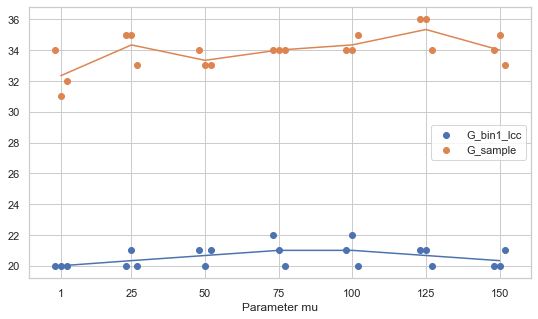

In [435]:
plt.figure(figsize = (9,5))
jit = np.array(['-2', '0','2']*7).astype(int)

df_bin1 = filter_data(mu_summary, 'Network', ['G_bin1_lcc'])
df_bin1_avg = df_bin1.groupby('mu').mean().reset_index()
df_sample = filter_data(mu_summary, 'Network', ['G_sample_lcc'])
df_sample_avg = df_sample.groupby('mu').mean().reset_index()

plt.scatter(df_bin1['mu'] + jit, df_bin1[['Estimate']], label = 'G_bin1_lcc')
plt.plot(df_bin1_avg['mu'], df_bin1_avg[['Estimate']])

plt.scatter(df_sample['mu'] + jit, df_sample['Estimate'], label = 'G_sample_lcc')
plt.plot(df_sample_avg['mu'], df_sample_avg[['Estimate']])
plt.xticks(np.array([1,25,50,75,100,125,150]))
plt.xlabel("Parameter mu")
plt.legend()

plt.show()



In [444]:
mcmc_summary['Network'].unique()

array(['G_bin1', 'G_bin50', 'G_sample', 'G_bin_1_lcc', 'G_bin50_lcc',
       'G_sample_lcc', 'G_sub25', 'G_sub50', 'G_sub75'], dtype=object)